In [1]:
%matplotlib inline

import json
import requests

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [2]:
#pe13 = requests.get('http://172.31.4.40:16000/metrics').json()
#pe13.keys()

In [3]:
#pe12 = requests.get('http://172.31.6.14:16000/metrics').json()
#pe12.keys()

In [4]:
#with open('data/pe13.json', 'w') as f:
    #json.dump(pe13, f)
with open('data/pe13.json') as f:
    pe13 = json.load(f)

    
#with open('data/pe12.json', 'w') as f:
    #json.dump(pe12, f)
with open('data/pe12.json') as f:
    pe12 = json.load(f)

In [5]:
def collect(metrics, version):
    for command, timer in metrics['timers'].items():
        if command.startswith('com.adatao.pa.rest.CommandServlet'):
            record = {
                'version': version,
                'command': command.replace('com.adatao.pa.rest.CommandServlet.', '', 1)
            }
            for key in ('count', 'min', 'max', 'mean', 'p50', 'p95', 'stddev'):
                record[key] = timer[key]
            yield record
        
timers = list(collect(pe12, '1.4.12')) + list(collect(pe13, '1.4.13'))
print len(timers)
timers[0]

33


{'command': u'fetchrows',
 'count': 41,
 'max': 0.5153981670000001,
 'mean': 0.09596435237675846,
 'min': 0.024846783,
 'p50': 0.034978552,
 'p95': 0.24702126700000002,
 'stddev': 0.0834474304702428,
 'version': '1.4.12'}

In [6]:
df = pd.DataFrame(timers)
df.head()

,command,count,max,mean,min,p50,p95,stddev,version
0,fetchrows,41,0.515398,0.095964,0.024847,0.034979,0.247021,0.083447,1.4.12
1,nrow,75,0.589587,0.108809,0.042498,0.049773,0.256085,0.086742,1.4.12
2,geturi,59,0.033737,0.007554,0.005338,0.007580,0.009936,0.001060,1.4.12
3,connect,15,0.130073,0.000289,0.000229,0.000229,0.000284,0.001824,1.4.12
4,countuniquevalues,2,2.008602,0.818453,0.772536,0.772536,0.772536,0.233769,1.4.12


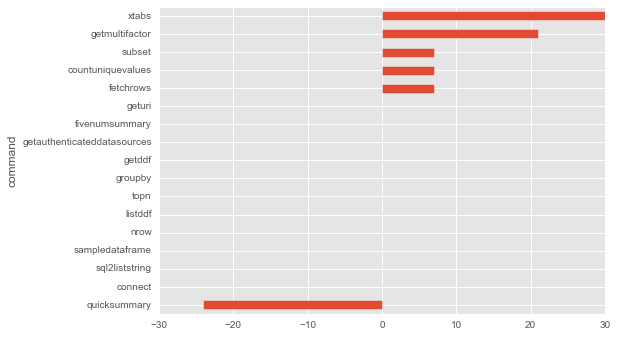

In [7]:
pe12_data = df[df.version == '1.4.12'].set_index('command')
pe13_data = df[df.version == '1.4.13'].set_index('command')

# difference in no. calls between 1.4.12 and 1.4.13
count_diff = pe13_data['count'].subtract(pe12_data['count'], fill_value=0)
count_diff.sort_values().plot.barh()

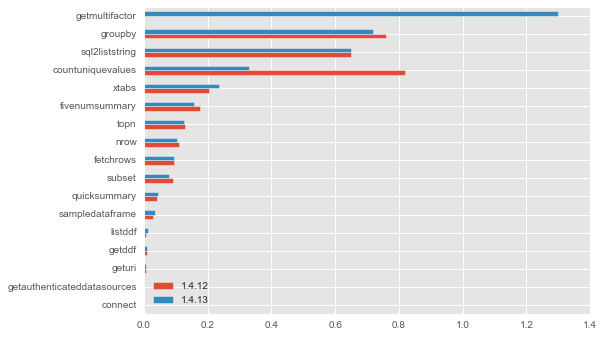

In [21]:
mean_compare = pd.concat([pe12_data['mean'], pe13_data['mean']], axis=1)
mean_compare.columns = ['1.4.12', '1.4.13']

# difference in number of calls per 
plot = mean_compare.sort_values('1.4.13').plot.barh()

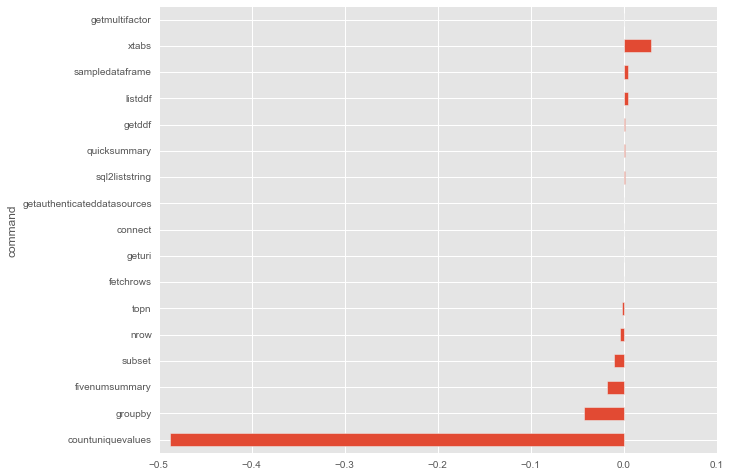

In [22]:
mean_diff = pe13_data['mean'] - pe12_data['mean']

plt.figure(figsize=(10, 8))
mean_diff.sort_values().plot.barh()

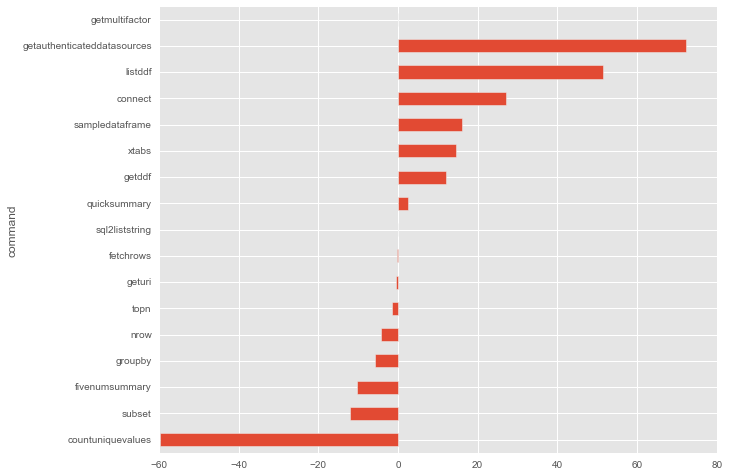

In [26]:
mean_diff_pct = (pe13_data['mean'] - pe12_data['mean']) / pe12_data['mean'] * 100

plt.figure(figsize=(10, 8))
mean_diff_pct.sort_values().plot.barh()